hello
Training LightGBM Model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1819
[LightGBM] [Info] Number of data points in the train set: 95744, number of used features: 14
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
Accuracy: 0.55

Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.68      0.68      4882
           2       0.59      0.61      0.60      4786
           3       0.48      0.34      0.40      4689
           4       0.42      0.39      0.40      4833
           5       0.53      0.71

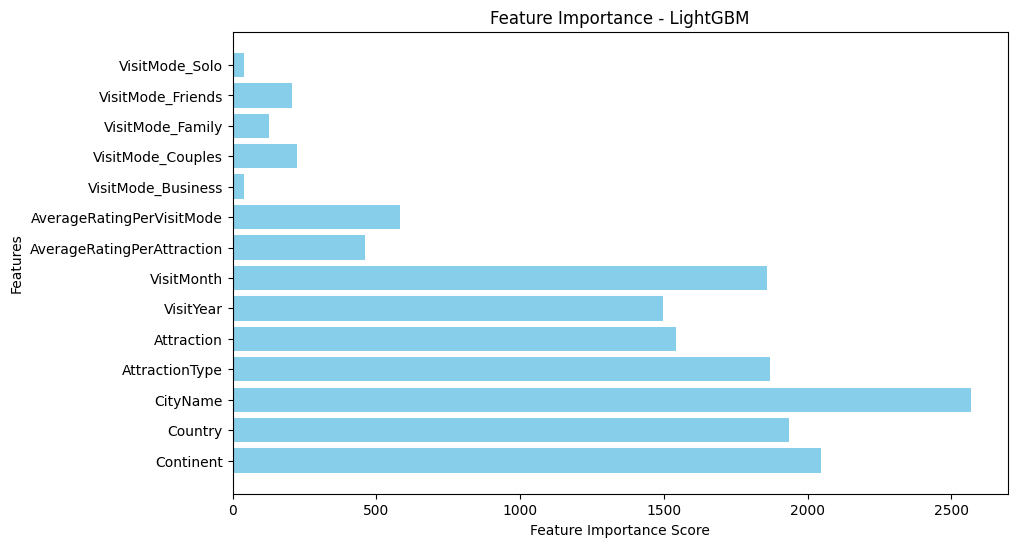

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score,mean_squared_error
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder
import joblib




def MainDataset():
    #User Details
    userdf=pd.read_excel('User.xlsx')
    #converted city float to int
    userdf['CityId']=userdf['CityId'].fillna(0)
    #print(userdf.isnull().sum())   --To check nullvalues
    userdf['CityId']=userdf['CityId'].astype(int)
    # print(userdf.dtypes)
    # print(userdf.head())

    # Continent Details
    continentdf=pd.read_excel('Continent.xlsx')
    #print(continentdf.head())

    #merging both user and continent
    user_contitentdf=userdf.merge(continentdf,on='ContinentId',how='left')
    #print(user_contitentdf.head())

    # Region Details
    Regiondf=pd.read_excel('Region.xlsx')
    #print(Regiondf.head())
    #Merging user Details with Region
    user_continent_regiondf=user_contitentdf.merge(Regiondf,on='RegionId',how='left')
    #print(user_continent_regiondf.head())


    #Contry Details
    countrydf=pd.read_excel('Country.xlsx')
    #print(countrydf.head())
    user_continent_region_Countrydf=user_continent_regiondf.merge(countrydf,on='CountryId',how='left')
    #print(user_continent_region_Countrydf.head())

    #cityDetails
    citydf=pd.read_excel('City.xlsx')
    #print(citydf.head())
    user_continent_region_Country_citydf=user_continent_region_Countrydf.merge(citydf,on='CityId',how='left')
    # print(user_continent_region_Country_citydf.head())

    #------------------------------------------------------------------------------------------------------------------#
    #User Details Ready
    user_detailsdf=user_continent_region_Country_citydf.drop(columns=["ContinentId_x","RegionId_x","CountryId_x","CityId","RegionId_y","CountryId_y","ContinentId_y"])
    print("UserDetails : After Merging")
    print(user_detailsdf.head())
    # print("Null checking")
    # print(user_detailsdf.isnull().sum())

    #------------------------------------------------------------------------------------------------------------------#

    print("Attraction Details")
    Attractiondf=pd.read_excel('Updated_Item.xlsx')
    #print(Attractiondf.head())

    #Attraction City 
    Attraction_citydf=Attractiondf.merge(citydf,left_on='AttractionCityId',right_on='CityId',how='left')
    Attraction_citydf=Attraction_citydf.rename(columns={'CityName':'AttractedCity'})
    print(Attraction_citydf.head())

    #Attraction Coutry
    Attraction_city_countrydf=Attraction_citydf.merge(countrydf,on='CountryId',how='left')
    print('Country')
    Attraction_city_countrydf=Attraction_city_countrydf.rename(columns={'Country':'AttractedCountry'})


    print(Attraction_city_countrydf.head())


    #Attracted Region
    Attraction_city_country_regiondf=Attraction_city_countrydf.merge(Regiondf,on='RegionId',how='left')
    print('Region....................')
    Attraction_city_country_regiondf=Attraction_city_country_regiondf.rename(columns={'Region':'AttractedRegion'})
    print(Attraction_city_country_regiondf.head())

    #Attracted Continent
    Attraction_city_country_region_continentdf= Attraction_city_country_regiondf.merge(continentdf,on='ContinentId',how='left')
    print('Continent....................')
    Attraction_city_country_region_continentdf=Attraction_city_country_region_continentdf.rename(columns={'Continent':'AttractedContinent'})
    print(Attraction_city_country_region_continentdf.head())


    typedf=pd.read_excel("Type.xlsx")
    Attraction_city_typedf=Attraction_city_country_region_continentdf.merge(typedf,on='AttractionTypeId',how='left')
    Attraction_detailsdf=Attraction_city_typedf.drop(columns=["AttractionCityId","AttractionTypeId","CityId","RegionId","ContinentId","CountryId"])
    print("Attraction Details :")
    print(Attraction_detailsdf.head())

    #Main Table 
    print("Transaction Details : ")
    Transactiondf=pd.read_excel('Transaction.xlsx')
    print(Transactiondf.head())

    #Merging Transaction and User details
    Transaction_userdf=Transactiondf.merge(user_detailsdf,on='UserId',how='left')

    #Merging transaction and attraction details 

    Transaction_user_attractiondf=Transaction_userdf.merge(Attraction_detailsdf,on='AttractionId',how='left')

    print(Transaction_user_attractiondf.head())



    modedf=pd.read_excel('Mode.xlsx')
    Transaction_user_attraction_modedf=Transaction_user_attractiondf.merge(modedf,left_on='VisitMode',right_on='VisitModeId',how='left')
    print('Main Dataset')
    print(Transaction_user_attraction_modedf.head())
    Transaction_user_attraction_modedf=Transaction_user_attraction_modedf.drop(columns=["VisitMode_x"])
    Transaction_user_attraction_modedf=Transaction_user_attraction_modedf.rename(columns={"VisitMode_y":"VisitMode"})
    Transaction_user_attraction_modedf.to_excel("TourismDataset.xlsx",index=False)


def Datacleaning(tourismdf):
    print(tourismdf.isnull().sum())  #Null Checked 
    #Discrepancies Checking 
    columns=["VisitYear","VisitMonth","Continent","Region","Country","CityName","Attraction","AttractionAddress","AttractedCity","AttractedCountry","AttractedRegion","AttractedContinent","AttractionType","VisitMode"]
    for col in columns:
        print(col)
        print(tourismdf[col].unique())

    #Since everything is correct Next to going to next step 

    #Outliers Hanndling 
    numerical_columns = ["Rating", "VisitMonth", "VisitModeId"]

    for col in numerical_columns:
        Q1=tourismdf[col].quantile(0.25)
        Q3=tourismdf[col].quantile(0.75)
        IQR=Q3-Q1
        lowerbound=Q1 - (1.5 * IQR)
        upperbound=Q3+(1.5*IQR)
        outliers = tourismdf[(tourismdf[col] < lowerbound) | (tourismdf[col] > upperbound)]
        print(f'Total Outliers{col}: {outliers[col].shape[0]}')
        
    plt.figure(figsize=(10, 6))
    tourismdf[numerical_columns].boxplot()
    plt.title("Box Plot of Numerical Columns")
    plt.show()
    return tourismdf


def DataPreprocessing(tourismdf):
    # Drop unnecessary columns 
    drop_cols = ["AttractedContinent", "AttractedRegion", "AttractedCountry", "AttractedCity"]
    tourismdf = tourismdf.drop(columns=drop_cols, errors='ignore')
    
    # Categorical columns that need encoding
    categorical_cols = ["VisitMode", "Continent", "Region", "Country", "CityName", 
                        "AttractionType", "Attraction", "AttractionAddress"]
    
    # Apply Label Encoding
    for col in categorical_cols:
        le = LabelEncoder()
        tourismdf[col + "_Encoded"] = le.fit_transform(tourismdf[col])
    
    # Feature Engineering: Compute Previous Average Ratings
    tourismdf['AverageRatingPerUser'] = tourismdf.groupby('UserId')['Rating'].transform('mean')
    tourismdf['AverageRatingPerAttraction'] = tourismdf.groupby('Attraction')['Rating'].transform('mean')

    # Save processed data
    tourismdf.to_excel("ProcessedTourismdata.xlsx", index=False)

    return tourismdf



def  Featuresselection(processeddata):
    #using wrapper Method
    X=processeddata.drop(columns=['Continent','Region','Country','CityName','Attraction','AttractionAddress','AttractionType','VisitModeId','VisitMode','TransactionId','UserId','AttractionId','Rating'])
   
    Y=processeddata['Rating']


    Numericaldata=processeddata.drop(columns=['Continent','Region','Country','CityName','Attraction','AttractionAddress','AttractionType','VisitModeId','VisitMode','TransactionId','UserId','AttractionId'])
    correlationmatrix=Numericaldata.corr()
    plt.figure(figsize=(20, 10))
    sns.heatmap(correlationmatrix,annot=True)
    plt.show()


    # model=RandomForestRegressor(n_estimators=100,n_jobs=-1)
    # rfe=RFE(estimator=model,n_features_to_select=6)
    # xselected=rfe.fit_transform(X,Y)

    # selectedFeatures=X.columns[rfe.support_]
    # print('using RFE MEthod ',selectedFeatures)
    

    #Embedded method
    print('Lasso Regression')
    lasso = Lasso(alpha=0.01)  # Adjust alpha for regularization strength
    lasso.fit(X, Y)

    # Get non-zero coefficients
    selected_features = X.columns[lasso.coef_ != 0]
    print("Selected Features:", selected_features)

    #wrapper method 
    print('Feature Importance from Random Forest')
    model=RandomForestRegressor()
    model.fit(X,Y)
    importance=model.feature_importances_
    feature_importance = dict(zip(X.columns, importance))
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    print(sorted_features)


def ModelTraining_Predcition(processeddata):
    # Compute Previous Average Rating (Cumulative Mean)
    processeddata["previousaveragerating"] = processeddata.groupby("AttractionId")["Rating"].expanding().mean().shift(1).reset_index(level=0, drop=True)

    # Fill NaN with a default value (e.g., the overall average rating)
    processeddata["previousaveragerating"] = processeddata["previousaveragerating"].fillna(processeddata["Rating"].mean())


    #Preprocessing Part 
     # Categorical columns for encoding
    target_encode_cols = ["Continent", "Region", "Country", "CityName", "AttractionType", "Attraction", "AttractionAddress"]
    
    # Apply Target Encoding for high-cardinality categorical columns
    te = TargetEncoder()
    processeddata[target_encode_cols] = te.fit_transform(processeddata[target_encode_cols],processeddata["Rating"])
    
    # One-Hot Encode VisitMode
    processeddata = pd.get_dummies(processeddata, columns=['VisitMode'], drop_first=True)


    X = processeddata[['VisitYear', 'VisitMonth', 'Continent', 'Region', 'Country', 
               'CityName', 'AttractionType', 'Attraction', 'AttractionAddress', 
               'VisitMode_B', 'VisitMode_C', 'VisitMode_D', 'VisitMode_E']]


    #X=processeddata.drop(columns=['Continent','Region','Country','CityName','Attraction','AttractionAddress','AttractionType','VisitModeId','VisitMode','TransactionId','UserId','AttractionId','Rating','Attraction_Encoded','AverageRatingPerUser','AverageRatingPerVisitMode','AverageRatingPerAttraction'])
    #X=processeddata[['Country_Encoded', 'CityName_Encoded', 'AttractionType_Encoded','Attraction_Encoded', 'AttractionAddress_Encoded']]
    #X=processeddata[['VisitYear', 'VisitMonth', 'Country_Encoded', 'CityName_Encoded']]
    # X=processeddata.drop(columns=['Continent','Region','Country','CityName','Attraction','AttractionAddress','AttractionType','VisitModeId','VisitMode','TransactionId','UserId','AttractionId','Rating'])
    # X=processeddata.drop(columns=['Continent','Region','Country','CityName','Attraction','AttractionAddress','AttractionType','VisitModeId','VisitMode','TransactionId','UserId','AttractionId','Rating','Attraction_Encoded','AverageRatingPerUser','AverageRatingPerVisitMode','AverageRatingPerAttraction'])


    print('Input Columns:\n',X)
    Y=processeddata['Rating']

    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=42)
    linearmodel=LinearRegression()
    linearmodel.fit(X_train,Y_train)
    Y_pred=linearmodel.predict(X_test)
    # Inverse transform predicted ratings
    
    RegressionModelEvaluationMetrics(Y_test,Y_pred)
    print('Random Forest Regression')
    randomforestmodel=RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
    randomforestmodel.fit(X_train,Y_train)
    Y_pred=randomforestmodel.predict(X_test)
    
    RegressionModelEvaluationMetrics(Y_test,Y_pred)


    print('XGBoost Regression')
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.01, max_depth=6)
    
    # Train Model
    xgb_model.fit(X_train, Y_train)
    
    # Predictions
    Y_pred = xgb_model.predict(X_test)
    RegressionModelEvaluationMetrics(Y_test,Y_pred)


    gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42)
    lgbm = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42)

    models = {"Gradient Boosting": gbr, "LightGBM": lgbm}

# Train and Evaluate Each Model
    for name, model in models.items():
        print(name)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        RegressionModelEvaluationMetrics(Y_test,Y_pred)

    print('Catboosting...........')
    X_cat=processeddata[['Continent','Region','Country','CityName','Attraction','AttractionAddress','AttractionType','VisitMode','AverageRatingPerUser','AverageRatingPerVisitMode','AverageRatingPerAttraction']]
    Y_cat=processeddata['Rating']

    Xcat_train, Xcat_test, ycat_train, ycat_test = train_test_split(X_cat,Y_cat, test_size=0.2, random_state=42)

    cat_features = ['Continent','Region','Country','CityName','Attraction','AttractionAddress','AttractionType','VisitMode']

    catmodel = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, cat_features=cat_features, verbose=0)
    catmodel.fit(Xcat_train, ycat_train)

    ycat_pred = catmodel.predict(Xcat_test)

    RegressionModelEvaluationMetrics(ycat_test,ycat_pred)




def RegressionModelEvaluationMetrics(Y_test,Y_pred):
    print('Model Evaluation Started...')
    mae=mean_absolute_error(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    rmse=np.sqrt(mse)
    r2score=r2_score(Y_test,Y_pred)
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2score:.2f}")
    print("-" * 40)


def RegressionModel(processeddata):
    #Featuresselection(processeddata)
    ModelTraining_Predcition(processeddata)


def  ClassificationModelTraining_Predcition(processeddata):
    '''
    #processeddata["previousaveragerating"] = processeddata.groupby("AttractionId")["Rating"].expanding().mean().shift(1).reset_index(level=0, drop=True)

    # Fill NaN with a default value (e.g., the overall average rating)
    #processeddata["previousaveragerating"] = processeddata["previousaveragerating"].fillna(processeddata["Rating"].mean())

     #Preprocessing Part 
    #Categorical columns for encoding
    target_encode_cols = ["Continent", "Region", "Country", "CityName", "AttractionType", "Attraction", "AttractionAddress", "VisitYear", "VisitMonth", "VisitMode"]
    
    # Apply Target Encoding for high-cardinality categorical columns
    te = TargetEncoder()
    processeddata[target_encode_cols] = te.fit_transform(processeddata[target_encode_cols],processeddata["Rating"])
    
    # One-Hot Encode VisitMode
    processeddata = pd.get_dummies(processeddata, columns=['VisitMode'], drop_first=True)


    X = processeddata[["Continent", "Region", "Country", "CityName", "AttractionType", "Attraction", "AttractionAddress", "VisitYear", "VisitMonth", "VisitMode"] + 
               [col for col in processeddata.columns if 'VisitMode_' in col]]

    plt.figure(figsize=(10,8))
    sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.show()

    #X=processeddata.drop(columns=['Continent','Region','Country','CityName','Attraction','AttractionAddress','AttractionType','VisitModeId','VisitMode','TransactionId','UserId','AttractionId','Rating','Attraction_Encoded','AverageRatingPerUser','AverageRatingPerAttraction','AverageRatingPerVisitMode'])
    #X=processeddata[['Country_Encoded', 'CityName_Encoded','Attraction_Encoded','VisitYear','VisitMonth','VisitMode_Encoded','AverageRatingPerUser','AverageRatingPerAttraction']]
    #X=processeddata.drop(columns=['Continent','Region','Country','CityName','Attraction','AttractionAddress','AttractionType','VisitModeId','VisitMode','TransactionId','UserId','AttractionId','Rating'])
    #X=processeddata[['UserId', 'CityName_Encoded', 'Attraction_Encoded', 'VisitMode_Encoded', 'AttractionType_Encoded']]

    y=processeddata['Rating']
     # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    '''

    #Smote Oversampling technique (increase the minority classes)
    # smote = SMOTE(random_state=42)    
    # X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

    # # Check the new class distribution
    # from collections import Counter
    # print("Class Distribution After SMOTE:", Counter(y_train_resampled))

    # # Initialize and train RandomForest Classifier
    # rf_model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
    # rf_model.fit(X_train_resampled, y_train_resampled) '''

    #Handling Imbalnce data using smote tomek
    # smote=SMOTETomek(random_state=42)
    # X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)
    #print('Random Forest classifier with imbalance handling')
    # adasyn = ADASYN(random_state=42)
    # X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
    # print("Class Distribution After SMOTE:", Counter(y_train_resampled))


    # # Train the Random Forest model
    # rf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # rf.fit(X_train_resampled, y_train_resampled)

    # # Predict on test data
    # y_pred = rf.predict(X_test)
    # ClassificationModelEvaluationMetrics(y_test, y_pred)

    #print('xgbClassifier')
    #y_train_adj = y_train - 1
    # #Initialize XGBoost
    # xgb_clf = xgb.XGBClassifier(
    #     objective='multi:softmax',  # Multi-class classification
    #     num_class=5,  # Ratings: 1-5
    #     eval_metric='mlogloss',  # Multi-class log loss
    #     use_label_encoder=False,
    #     random_state=42
    # )

    # # Train the model
    # xgb_clf.fit(X_train, y_train_adj)

    # # Predictions
    # y_pred = xgb_clf.predict(X_test)+1
    # ClassificationModelEvaluationMetrics(y_test, y_pred)


    # param_grid = {
    # 'max_depth': [3, 5, 7],
    # 'learning_rate': [0.01, 0.05, 0.1],
    # 'n_estimators': [100, 200, 500],
    # 'subsample': [0.8, 1],
    # 'colsample_bytree': [0.8, 1]
    # }

    # # Initialize the classifier
    # xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)

    # # Grid search
    # grid_search = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=3, verbose=2)
    # grid_search.fit(X_train, y_train_adj)

    # # Best model
    # best_xgb = grid_search.best_estimator_
    # y_pred = best_xgb.predict(X_test) + 1  # Adjust back the labels
    # ClassificationModelEvaluationMetrics(y_test, y_pred)

    # print('lightgbm')
    # lgb_clf = lgb.LGBMClassifier(objective='multiclass', num_class=5, random_state=42)
    # lgb_clf.fit(X_train, y_train)

    # y_pred = lgb_clf.predict(X_test)
    # ClassificationModelEvaluationMetrics(y_test, y_pred)
    # # Get feature importance
    # feature_importance = lgb_clf.feature_importances_
    # features = X_train.columns
    # print(features,feature_importance)

    # # Plot feature importance
    # plt.figure(figsize=(10, 6))
    # plt.barh(features, feature_importance, color='skyblue')
    # plt.xlabel("Feature Importance Score")
    # plt.ylabel("Features")
    # plt.title("Feature Importance - LightGBM")
    # plt.show()
    # '''

      # 🔹 Define categorical columns for Target Encoding
    target_encode_cols = ["Continent", "Country", "CityName", "AttractionType", "Attraction"]
    
    # 🔹 Apply Target Encoding
    te = TargetEncoder()
    processeddata[target_encode_cols] = te.fit_transform(processeddata[target_encode_cols], processeddata["Rating"])
    
    # 🔹 One-Hot Encode VisitMode
    processeddata = pd.get_dummies(processeddata, columns=['VisitMode'], drop_first=False)
    processeddata=processeddata.drop(columns='VisitMode_Encoded')
    # 🔹 Define Features (X) and Target (y)
    X = processeddata[['Continent','Country', 'CityName', 
                       'AttractionType', 'Attraction', 
                       'VisitYear', 'VisitMonth','AverageRatingPerAttraction','AverageRatingPerVisitMode'] + 
                       [col for col in processeddata.columns if 'VisitMode_' in col]]

    y = processeddata['Rating']

    # 🔹 Train-Test Split
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

    # 🔹 Handle Imbalanced Data Using SMOTE
    

    # 🔹 Train LightGBM Model
    print("Training LightGBM Model...")
    lgb_clf = lgb.LGBMClassifier(objective='multiclass', num_class=5,class_weight='balanced', random_state=42)
    lgb_clf.fit(X_train, y_train)

    # 🔹 Model Evaluation
    y_pred = lgb_clf.predict(X_test)
    ClassificationModelEvaluationMetrics(y_test, y_pred)
    # 🔹 Save the Model & Encoder
    joblib.dump(lgb_clf, "lightgbm_model.pkl")
    joblib.dump(te, "target_encoder.pkl")
    joblib.dump(X.columns.tolist(), "input_features.pkl")  # Save feature names for later use

    print("✅ Model, encoder, and feature names saved successfully!")

    # 🔹 Plot Feature Importance
    feature_importance = lgb_clf.feature_importances_
    features = X_train.columns
    plt.figure(figsize=(10, 6))
    plt.barh(features, feature_importance, color='skyblue')
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Feature Importance - LightGBM")
    plt.show()







def ClassificationModelEvaluationMetrics(y_test, y_pred):
# Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print('*'*40)



def ClassifierModel(processeddata):
     #Featuresselection(processeddata)
    ClassificationModelTraining_Predcition(processeddata)


def main():
    print('hello')
    #MainDataset()
    #tourismdatasetdf=pd.read_excel("TourismDataset.xlsx")
    #DataPreprocessing(tourismdatasetdf)
    processeddata=pd.read_excel('ProcessedTourismdata.xlsx')
    #RegressionModel(processeddata)
    #ClassifierModel(processeddata)
    ClassifierModel(processeddata)

if __name__=="__main__":
     main()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from category_encoders import TargetEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from imblearn.over_sampling  import SMOTE,ADASYN
from imblearn.combine import SMOTETomek
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import joblib




def VisitModeDistribution(data):
    """
    Function to plot the distribution of the VisitMode column.
    """
    plt.figure(figsize=(8, 6))
    sns.countplot(x='VisitMode', data=data, palette='Set2')
    plt.title('Visit Mode Distribution')
    plt.xlabel('Visit Mode')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


def ClassificationModelTraining_Predcition(data):
    """
    Function to train the classification model and evaluate the results.
    """
    data = data[['VisitYear', 'VisitMonth', 'Rating', 'Continent', 'Country', 'CityName', 'Attraction', 'AttractionType', 'VisitMode']]

    # Plot the VisitMode distribution
    print(data['VisitMode'].value_counts())

    # List of categorical columns with many unique values
    categorical_columns = ['Continent', 'Country', 'CityName', 'AttractionType', 'Attraction']
    label_encoder = LabelEncoder()
    target_encoded_data = data.copy()  # Keep a copy to avoid modifying the original data
    target_encoded_data['VisitMode'] = label_encoder.fit_transform(target_encoded_data['VisitMode'])
    target_column='VisitMode'
    # ✅ Step 2: Apply Target Encoding for Categorical Features
    target_encoder = TargetEncoder(cols=categorical_columns)
    target_encoded_data[categorical_columns] = target_encoder.fit_transform(
        target_encoded_data[categorical_columns], 
        target_encoded_data['VisitMode']  # Now VisitMode is numeric
)
    
    # 3. Model Training (Random Forest Classifier)
    X = target_encoded_data.drop(columns=[target_column])  # Features (input)
    y = target_encoded_data[target_column]  # Target variable (output)

    # smote_tomek = SMOTETomek(random_state=42)
    # X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
    

    # 🔹 Train-Test Split
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # # 🔹 Handle Imbalanced Data Using ADASYN
    # adasyn = ADASYN(random_state=42, sampling_strategy='auto')
    # X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)


    # # Train the Random Forest Classifier
    # rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
    # rf_model.fit(X_train_resampled, y_train_resampled)

    # # Evaluate the model
    # y_pred = rf_model.predict(X_test)
    # Step 1: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    adasyn = ADASYN(random_state=42, sampling_strategy='auto')
    X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

    # smote_tomek = SMOTETomek(random_state=42)
    # X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)
    '''
    print('RandomForestClassifier')
    rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
    rf_model.fit(X_train_resampled, y_train_resampled)
    print(y_train_resampled.value_counts())

    feature_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": rf_model.feature_importances_})
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

    # Plot top features
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importance[:10])
    plt.title("Top 10 Feature Importances")
    plt.show()



    y_pred = rf_model.predict(X_test)
    ClassificationModelEvaluationMetrics(y_test, y_pred)
    evaluate_model(rf_model, X_test, y_test)

    print('GradientBoostingClassifier')
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train_resampled, y_train_resampled)
    y_pred = gb_model.predict(X_test)
    ClassificationModelEvaluationMetrics(y_test, y_pred)
    evaluate_model(gb_model, X_test, y_test)
    '''
    print('xgb')
    xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=2)  # scale_pos_weight can be tuned based on class imbalance
    xgb_model.fit(X_train_resampled, y_train_resampled)

    # Step 4: Evaluate the Model on the Test Set
    y_pred = xgb_model.predict(X_test)
    ClassificationModelEvaluationMetrics(y_test, y_pred)
    evaluate_model(xgb_model, X_test, y_test)

    Model_properities={
            'classModel':xgb_model,
            'classlabel_encoder':label_encoder,
            'classtarget_encoder':target_encoder,
            'classfeature_names': list(X_train.columns)
    }

    joblib.dump(Model_properities,'ClassifierModelProperities.pkl')
    print('Model Saved Successfully....!')
     

    print('lightgbm')
    '''
    # Step 3: Train the LightGBM Classifier on resampled data
    lgb_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
    lgb_model.fit(X_train_resampled, y_train_resampled)

    # Step 4: Evaluate the Model on the Test Set
    y_pred = lgb_model.predict(X_test)
    ClassificationModelEvaluationMetrics(y_test, y_pred)
    evaluate_model(lgb_model, X_test, y_test)
    '''


def ClassificationModelEvaluationMetrics(y_test, y_pred):
    """
    Function to evaluate and print the classification metrics.
    """
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the given model using multiple metrics (Precision, Recall, F1-Score, ROC-AUC, Precision-Recall AUC).
    
    Parameters:
    model: Trained model to evaluate.
    X_test: Test features.
    y_test: True labels for the test data.
    
    Returns:
    A dictionary containing Precision, Recall, F1-Score, ROC-AUC, and Precision-Recall AUC.
    """
      # Predict labels and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)  # This will give us probabilities for all classes
    
    # Precision, Recall, F1-Score (weighted average for multi-class classification)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')  # y_prob is now (n_samples, n_classes)
    
    # Calculate Precision-Recall AUC for each class in multiclass
    n_classes = y_prob.shape[1]  # Number of classes
    pr_auc_per_class = []
    for i in range(n_classes):
        precision_vals, recall_vals, _ = precision_recall_curve(y_test == i, y_prob[:, i])
        pr_auc_per_class.append(auc(recall_vals, precision_vals))
    
    # Average Precision-Recall AUC for all classes
    pr_auc = np.mean(pr_auc_per_class)
    
    # Print Metrics
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')
    print(f'Precision-Recall AUC (Average): {pr_auc:.4f}')    
    print('*' * 40)
        

def ClassifierModel(processeddata):
    """
    Function to process the data and train the model.
    """
    ClassificationModelTraining_Predcition(processeddata)


def main():
    """
    Main function to run the code.
    """
   
    # Load dataset (replace with your actual dataset path)
    tourismdatasetdf = pd.read_excel("TourismDataset.xlsx")

    # Train the classification model
    ClassifierModel(tourismdatasetdf)


if __name__ == "__main__":
    main()


VisitMode
Couples     21620
Family      15217
Friends     10945
Solo         4525
Business      623
Name: count, dtype: int64
xgb


c:\Users\joeli\OneDrive\Documents\PYTHON\GuviProject4 (RCU)\Environment\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:22:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.53

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.23      0.15       130
           1       0.56      0.74      0.64      4290
           2       0.57      0.48      0.52      3079
           3       0.45      0.31      0.36      2171
           4       0.42      0.22      0.29       916

    accuracy                           0.53     10586
   macro avg       0.42      0.40      0.39     10586
weighted avg       0.52      0.53      0.51     10586


Confusion Matrix:
 [[  30   45   26   25    4]
 [  81 3191  577  341  100]
 [  60 1149 1484  309   77]
 [  64  920  413  669  105]
 [  33  409  112  158  204]]
Precision: 0.5203
Recall: 0.5269
F1-Score: 0.5119
ROC-AUC: 0.7429
Precision-Recall AUC (Average): 0.4303
****************************************
Model Saved Successfully....!
lightgbm


# Recommendation System Working

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix



df=pd.read_excel('TourismDataset.xlsx')
Fulldatasetdf=df.copy()
# 2️⃣ Select Relevant Columns
df = df[['UserId', 'AttractionId', 'Rating']]


df_grouped = df.groupby(['UserId', 'AttractionId'], as_index=False)['Rating'].mean()

useritemmatrix=df_grouped.pivot(index='UserId',columns='AttractionId',values='Rating')

sparse_matrix=csr_matrix(useritemmatrix.fillna(0))

user_similarity=cosine_similarity(sparse_matrix)

user_similaritydf=pd.DataFrame(user_similarity,index=useritemmatrix.index,columns=useritemmatrix.index)



# Create mapping for AttractionId -> Attraction name
id_to_name = Fulldatasetdf.drop_duplicates('AttractionId').set_index('AttractionId')['Attraction'].to_dict()

# Final recommendation function
def recommend_attractions(user_id, top_n=5):
    if user_id not in user_similaritydf.index:
        return "User not found!"
    
    # Get Similar Users (excluding the user itself)
    similar_users = user_similaritydf[user_id].sort_values(ascending=False)[1:6]

    # Get attractions rated by similar users
    similar_users_ratings = useritemmatrix.loc[similar_users.index].mean(axis=0)

    # Filter out attractions already rated by the user
    user_rated = useritemmatrix.loc[user_id]
    unrated = user_rated[user_rated.isna()].index
    recommendations = similar_users_ratings.loc[unrated].sort_values(ascending=False).head(top_n)

    # Map to names
    recommendation_list = [ id_to_name.get(attr_id, "Unknown Attraction") for attr_id in recommendations.index]
    # Format Output
    output = f"🎯 Top {top_n} Recommended Attractions for User ID {user_id}:\n\n"
    sino=0
    for name in recommendation_list:
        sino+=1
        output += f"{sino}.{name} \n"
    
    return output

user_id_to_test = 20977 # Change this to an actual UserId from your dataset
recommended_attractions = recommend_attractions(user_id_to_test)
print("Recommended Attractions:", recommended_attractions)

Recommended Attractions: 🎯 Top 5 Recommended Attractions for User ID 14:

1.Kuta Beach - Bali 
2.Nusa Dua Beach 
3.Sanur Beach 
4.Seminyak Beach 
5.Tanah Lot Temple 

